In [81]:
using DIVAnd
using Dates
using NCDatasets
using Test
using PyPlot
using Statistics
using DelimitedFiles
const plt = PyPlot
include("./ME4OH.jl")
include("./config.jl")

[ Info: Directory exists
[ Info: File already downloaded


In [49]:
datadir = "/home/ctroupin/data/ME4OH/"
datafile1 = joinpath(datadir, "ofam3-jra55.all.EN.4.1.1.f.profiles.g10.200501.update.extra.anom.200501_201412.nc")
datafile2 = joinpath(datadir, "ofam3-jra55.all.EN.4.1.1.f.profiles.g10.200501.update.extra.danom.200501_201412.nc")

"/home/ctroupin/data/ME4OH/ofam3-jra55.all.EN.4.1.1.f.profiles.g10.200501.update.extra.danom.200501_201412.nc"

In [51]:
@time lon, lat, dates, vertical_levels, T, S, dohc, dohc_mask, ts_bound, depth_level_thickness = 
ME4OH.read_profile(datafile1);
@time lon2, lat2, dates2, vertical_levels2, T2, S2, dohc2, dohc_mask2, ts_bound2, depth_level_thickness2 = 
ME4OH.read_profile(datafile2);

  0.009379 seconds (2.65 k allocations: 6.267 MiB)
  0.008677 seconds (2.74 k allocations: 6.271 MiB)


In [68]:
datafile = "/media/ctroupin/T7 Shield/000060826v009/data/en4.1.1/1979-2014/ofam3-jra55.all.EN.4.1.1.f.profiles.g10.197901.update.extra.danom.197901_201412.nc"

"/media/ctroupin/T7 Shield/000060826v009/data/en4.1.1/1979-2014/ofam3-jra55.all.EN.4.1.1.f.profiles.g10.197901.update.extra.danom.197901_201412.nc"

In [69]:
@time lon, lat, dates, vertical_levels, T, S, dohc, adohc, dadohc, dohc_mask, ts_bounds, depth_level_thickness = 
ME4OH.read_profile(datafile);

  0.007497 seconds (3.18 k allocations: 4.373 MiB)


In [70]:
dohc[1,:]

8781-element Vector{Float32}:
   0.3418893
   0.34191954
   0.34235555
   0.3443223
   0.3419374
   0.3422013
   0.34469402
   0.3425942
   0.3443935
   0.34525213
   0.34470618
   0.3445559
   0.34528354
   ⋮
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
   0.34614936
 NaN
 NaN

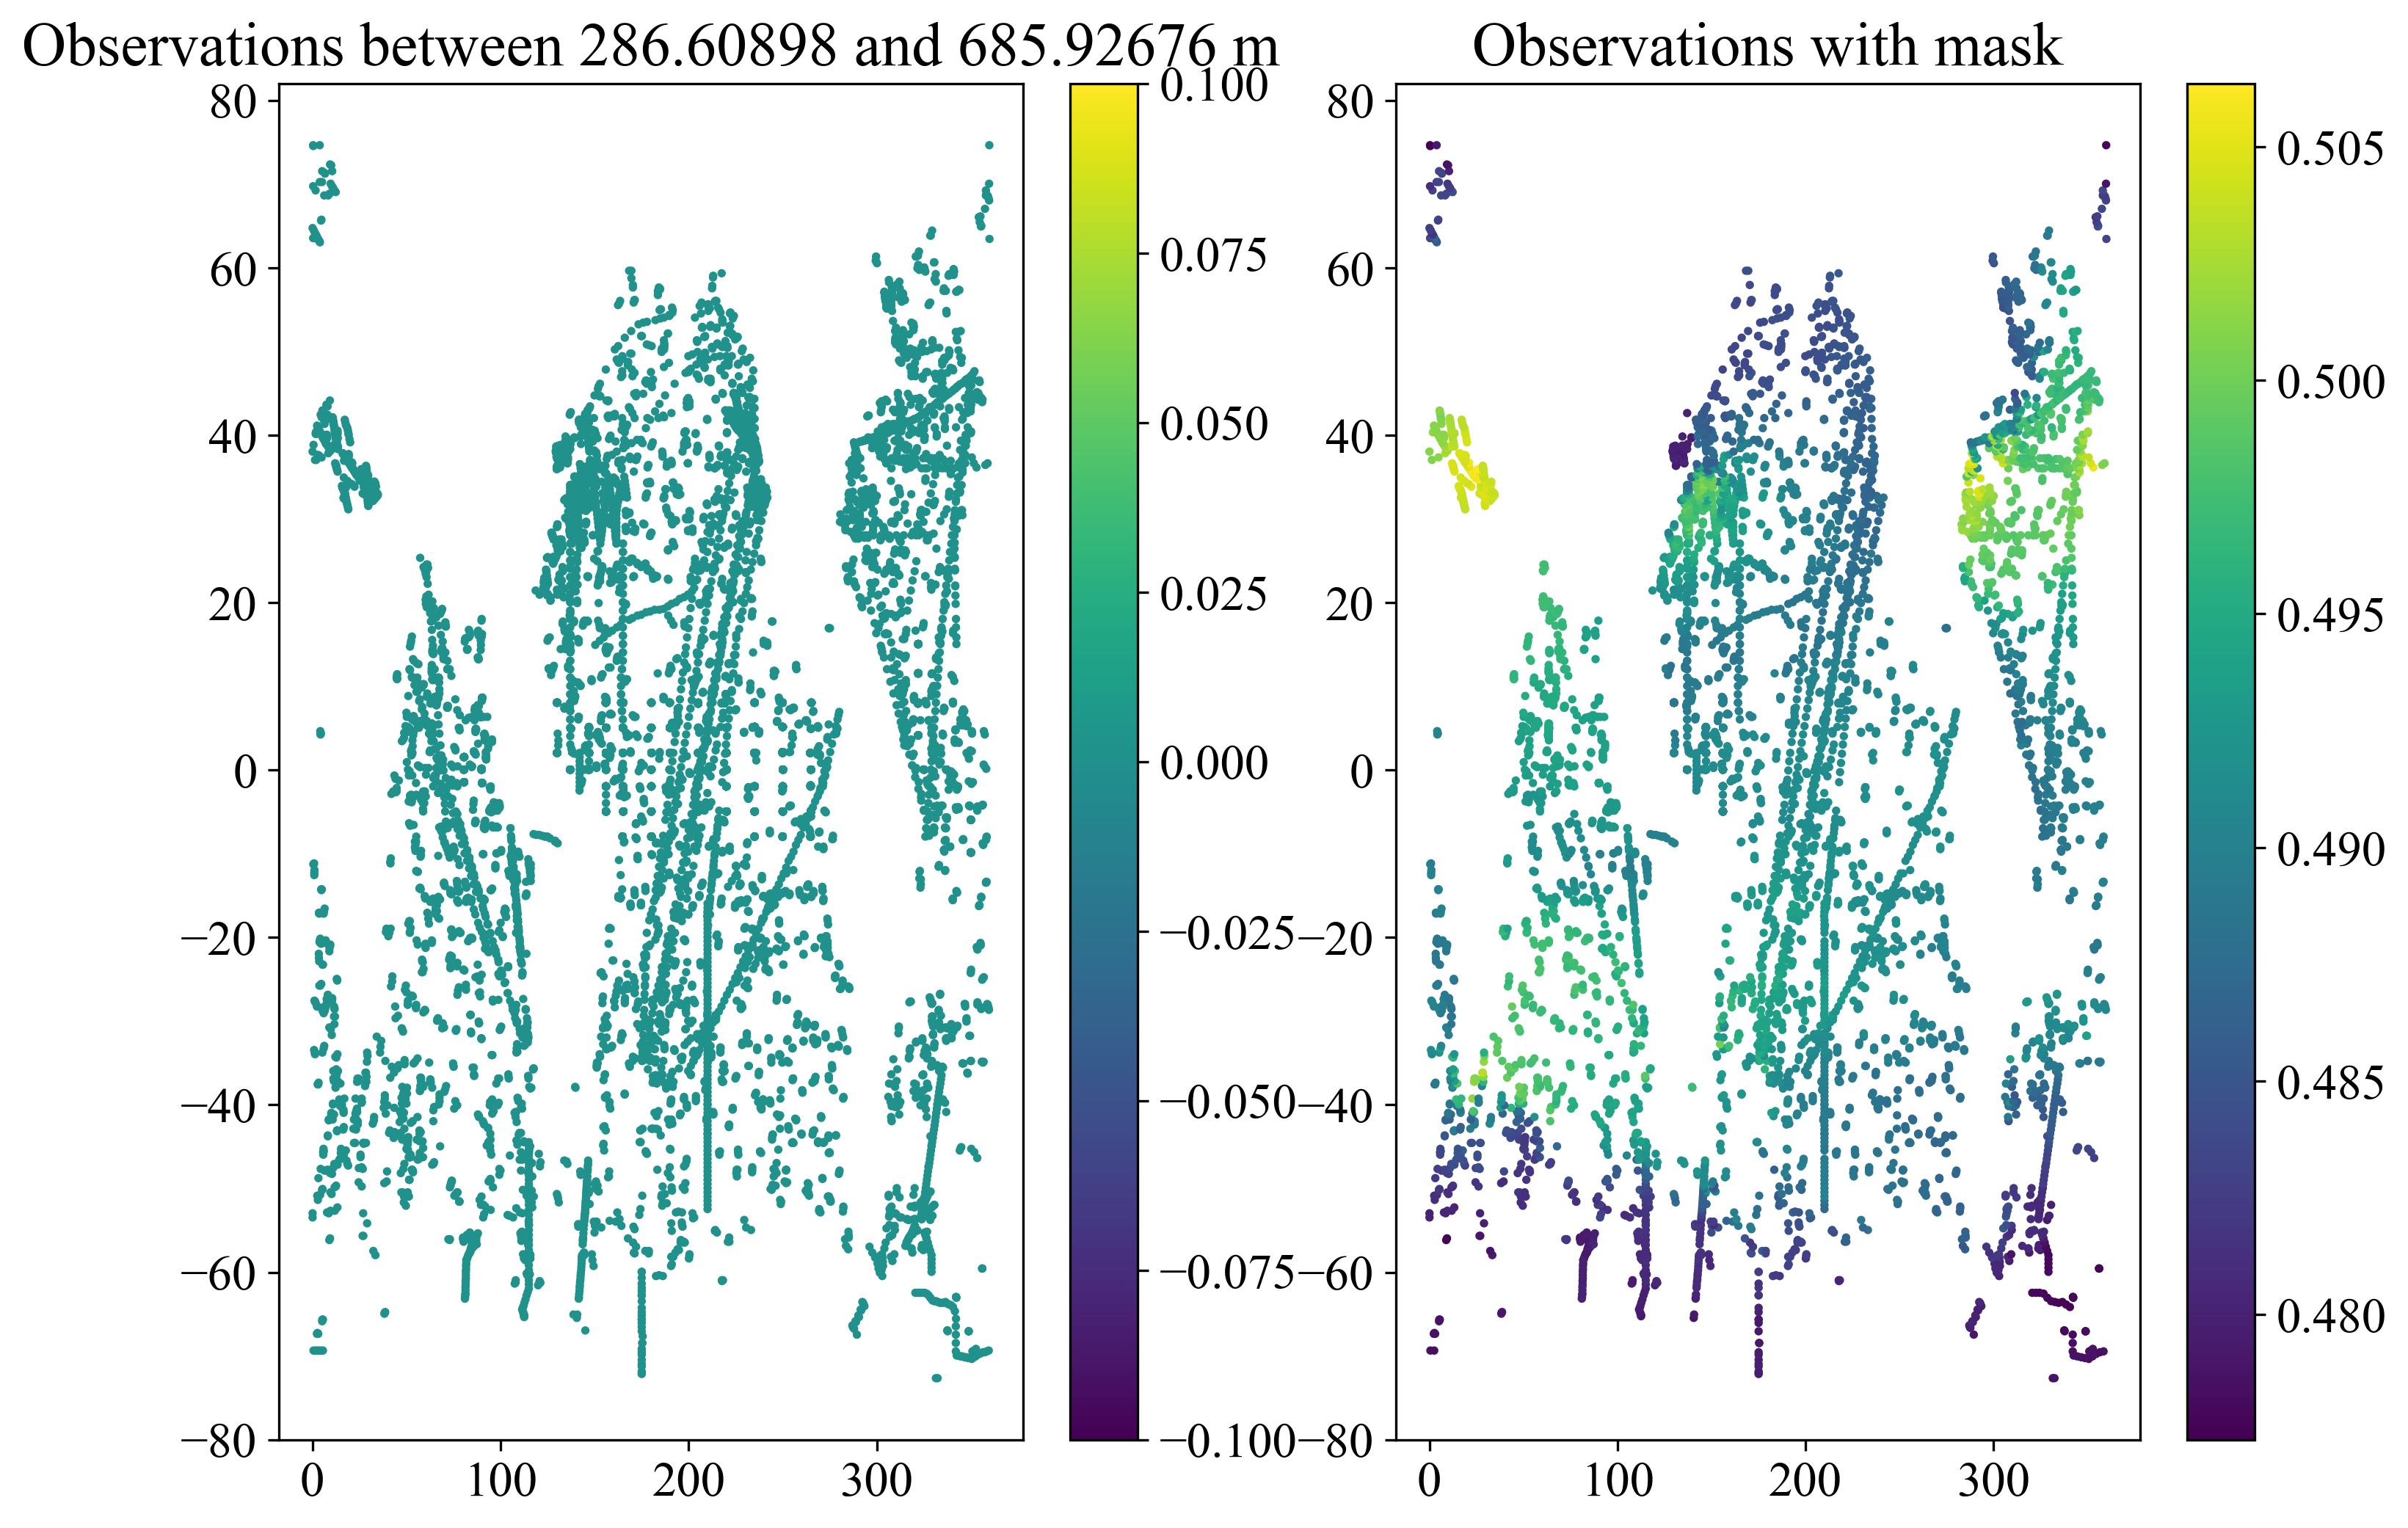

In [57]:
fig = plt.figure()
ax1 = plt.subplot(121)
scat = ax1.scatter(lon, lat, s=3, c=dohc[dohc_level,:]-dohc2[dohc_level,:])
plt.colorbar(scat)
ax1.set_title("Observations between $(ts_bound[dohc_level,1]) and $(ts_bound[dohc_level,2]) m")
ax2 = plt.subplot(122)
scat = ax2.scatter(lon[dohc_mask[dohc_level,:]], lat[dohc_mask[dohc_level,:]], s=3, 
c=dohc[dohc_level, dohc_mask[dohc_level,:]])
plt.colorbar(scat)
ax2.set_title("Observations with mask")
plt.show()

In [76]:
ME4OH.datetime2days(timeperiod1)

432-element Vector{Float64}:
 28854.0
 28885.0
 28913.0
 28944.0
 28974.0
 29005.0
 29035.0
 29066.0
 29097.0
 29127.0
 29158.0
 29188.0
 29219.0
     ⋮
 41638.0
 41669.0
 41697.0
 41728.0
 41758.0
 41789.0
 41819.0
 41850.0
 41881.0
 41911.0
 41942.0
 41972.0

In [80]:
timegrid1 = ME4OH.get_timegrid(timeperiod1);
filename = ME4OH.make_fname(timeperiod1, depthlayer1, "A")
ME4OH.create_netcdf_results(joinpath(outputdir, filename), longrid, latgrid, timeperiod1; valex=-999)

LoadError: attributes can only be scalars or vectors

432-element Vector{DateTime}:
 1979-01-01T00:00:00
 1979-02-01T00:00:00
 1979-03-01T00:00:00
 1979-04-01T00:00:00
 1979-05-01T00:00:00
 1979-06-01T00:00:00
 1979-07-01T00:00:00
 1979-08-01T00:00:00
 1979-09-01T00:00:00
 1979-10-01T00:00:00
 1979-11-01T00:00:00
 1979-12-01T00:00:00
 1980-01-01T00:00:00
 ⋮
 2014-01-01T00:00:00
 2014-02-01T00:00:00
 2014-03-01T00:00:00
 2014-04-01T00:00:00
 2014-05-01T00:00:00
 2014-06-01T00:00:00
 2014-07-01T00:00:00
 2014-08-01T00:00:00
 2014-09-01T00:00:00
 2014-10-01T00:00:00
 2014-11-01T00:00:00
 2014-12-01T00:00:00